In [1]:
import numpy as np
import networkx as nx
import itertools
import time
import matplotlib.pyplot as plt
from copy import deepcopy
plt.rcParams['figure.figsize'] = [15,10]

In [2]:
from sys import maxsize
from scipy.sparse.csgraph import minimum_spanning_tree
INT_MAX = maxsize

In [3]:
def readData(filename):
    return np.loadtxt(filename, dtype=int)

In [4]:
def visualize(matrix, label=True):
    G = nx.from_numpy_matrix(matrix, create_using=nx.DiGraph)
    layout = nx.spring_layout(G)
    nx.draw(G, layout, with_labels = True)
    if label:
        nx.draw_networkx_edge_labels(G, pos=layout)
    plt.show()

In [5]:
case1 = np.array([[0,25,25,13],
               [25,0,25,13],
               [25,25,0,13],
               [13,13,13,0]])

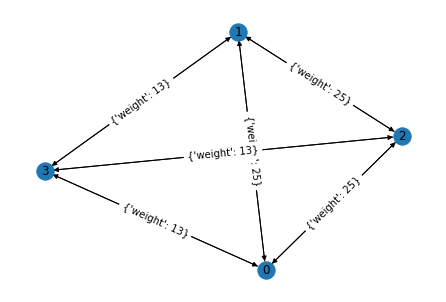

In [6]:
visualize(case1)

In [7]:
def prim(G):
    V = len(G)
    visited = [False] * V
    visited[0] = True
    
    result = [[0] * V for _ in range(V)]
    
    count = 0
    cost = 0
    while count < V - 1:
        minw = INT_MAX
        start = -1
        end = -1
        for i in range(V):
            for j in range(V):
                if (G[i][j] != 0 and G[i][j] < minw):
                    if (i != j and visited[i] != visited[j]):
                        minw = G[i][j]
                        start = i
                        end = j
                        
        if start != -1 and end != -1:
            result[start][end] = result[end][start] = minw
            count += 1
            cost += minw
            visited[start] = visited[end] = True
        
    return result, cost

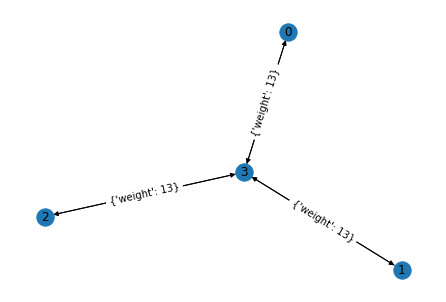

In [8]:
mst = prim(case1)
visualize(np.array(mst[0]))

In [9]:
def min_weight_perfect_matching(G, MST):
    V = len(G)
    
    # calculate edges degree
    d = [0] * V
    for i in range(V):
        for j in range(V):
            if MST[i][j] != 0:
                d[i] += 1
    
    visited = [False] * V
    result = [[0] * V for _ in range(V)]
    cost = 0
    
    for i in range(V):
        if d[i] % 2 != 0 and visited[i] != True:
            minw = INT_MAX
            des = -1
            for j in range(V):
                if G[i][j] != 0 and G[i][j] < minw and visited[j] != True:
                    minw = G[i][j]
                    des = j

            if des != -1:
                cost += minw
                result[i][des] = result[des][i] = minw
                visited[i] = visited[des] = True
    
    return result, cost

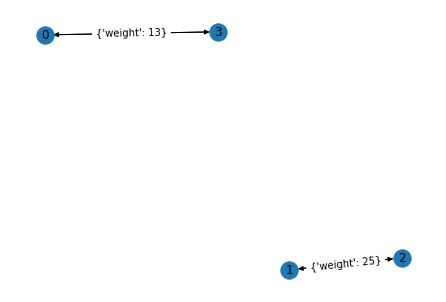

In [10]:
mwp = min_weight_perfect_matching(case1, mst[0])
visualize(np.array(mwp[0]))

In [11]:
def union(MST, MWP):
    V = len(MST)
    result = deepcopy(MST)
    
    for i in range(V):
        for j in range(V):
            if MST[i][j] == 0 and MWP[i][j] != 0:
                result[i][j] = MWP[i][j]
    
    return result

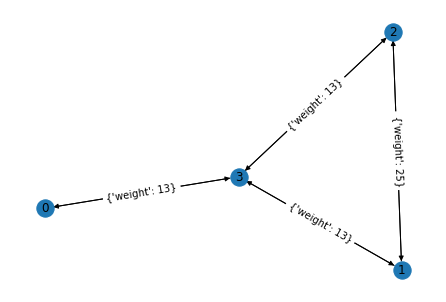

In [12]:
r = union(mst[0], mwp[0])
visualize(np.array(r))

In [21]:
def solver(G):
    V = len(G)
    visited = [False] * V
    visited[0] = True
    
    path = [0,]
    cost = 0
    for i in range(V):
        for j in range(V):
            if G[i][j] != 0 and visited[j] == False:
                path.append(j)
                cost += G[i][j]
                visited[j] = True
    
    return path, cost

In [15]:
solver(r)

[0, 3, 2, 1]

In [16]:
case3 = readData('/home/sn/Desktop/travelling-salesman-problem/data/burma14.tsp')

In [17]:
mst3 = prim(case3)

In [18]:
mwp3 = min_weight_perfect_matching(case3, mst3[0])

In [19]:
r3 = union(mst3[0], mwp3[0])

In [22]:
solver(r3)

([0, 1, 7, 13, 11, 5, 4, 12, 10, 9, 8, 3, 6, 2], 2935)